# Convolutional Neural Networks

In [1]:
import torch
import torch.nn as nn
from torchvision import transforms
from torchvision.io import read_image

import numpy as np
import matplotlib.pyplot as plt

## Load Image

In [2]:
def show_image(images, labels):
    fix, axs = plt.subplots(ncols=len(images), squeeze=False, figsize=(12, 6))
    for i, (image, label) in enumerate(zip(images, labels)):
        img = transforms.ToPILImage()(image.to('cpu'))
        axs[0, i].imshow(np.asarray(img), cmap='gray')
        axs[0, i].set_title(label)
        axs[0, i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

In [3]:
image_transforms = transforms.Compose([
    transforms.ConvertImageDtype(torch.float),
    transforms.Grayscale()
])

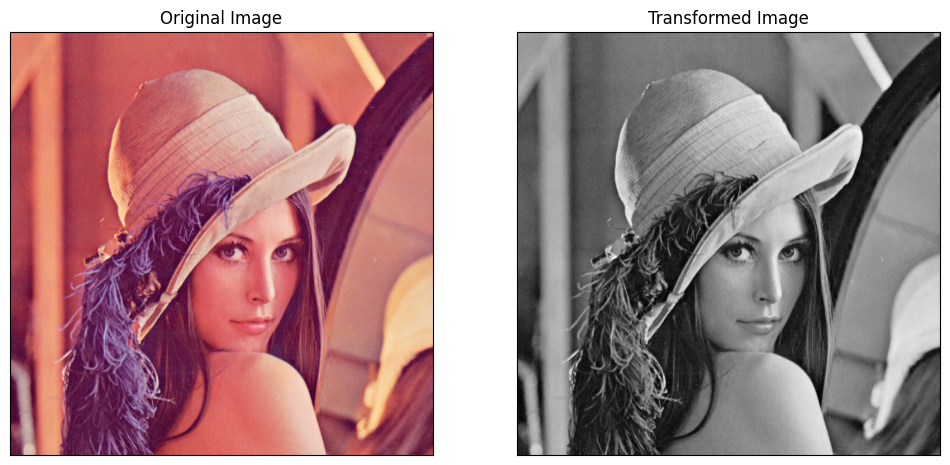

In [4]:
origin_img = read_image('../assets/images/lena_std.png')
trans_img = image_transforms(origin_img)
show_image([origin_img, trans_img], ['Original Image', 'Transformed Image'])

## Convolutions for Edge Detection

### Sobel Edge Detector

- See: [ Sobel Edge Detector ](https://homepages.inf.ed.ac.uk/rbf/HIPR2/sobel.htm)

In [5]:
class SobelEdgeDetection(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv_x = nn.Conv2d(1, 1, kernel_size=3, bias=False)
        self.conv_y = nn.Conv2d(1, 1, kernel_size=3, bias=False)

    def forward(self, x):
        g_x = torch.abs(self.conv_x(x))
        g_y = torch.abs(self.conv_y(x))
        return g_x+g_y

edge_detector = SobelEdgeDetection()
print(edge_detector)
print(edge_detector.conv_x.weight.shape)

SobelEdgeDetection(
  (conv_x): Conv2d(1, 1, kernel_size=(3, 3), stride=(1, 1), bias=False)
  (conv_y): Conv2d(1, 1, kernel_size=(3, 3), stride=(1, 1), bias=False)
)
torch.Size([1, 1, 3, 3])


In [6]:
sobel_x = torch.tensor([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]],
    dtype=torch.float32).unsqueeze(0).unsqueeze(0)
sobel_y = torch.tensor([
    [-1, -2, -1],
    [0, 0, 0],
    [1, 2, 1]],
    dtype=torch.float32).unsqueeze(0).unsqueeze(0)

edge_detector.conv_x.weight.data = sobel_x
edge_detector.conv_x.weight.requires_grad = False
edge_detector.conv_y.weight.data = sobel_y
edge_detector.conv_y.weight.requires_grad = False

In [7]:
filter_image = edge_detector(trans_img)

print(filter_image.shape)

torch.Size([1, 510, 510])


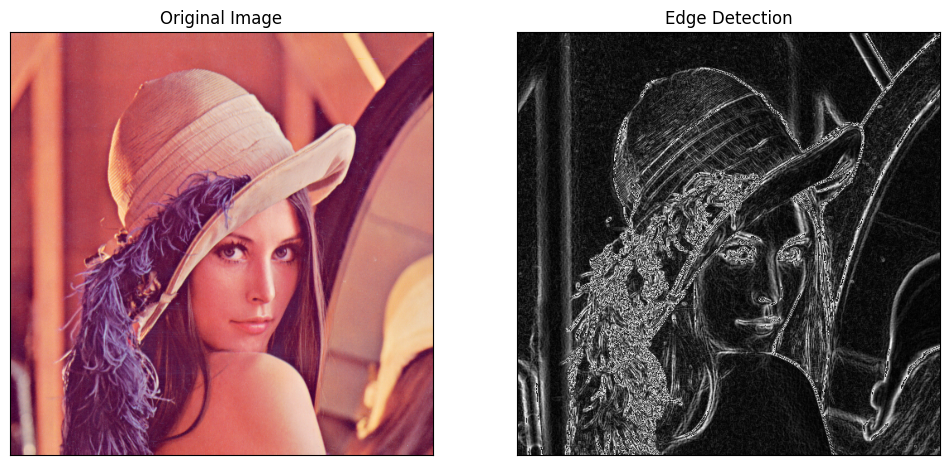

In [8]:
show_image([origin_img, filter_image], ['Original Image', 'Edge Detection'])

## Learning a Kernel

- TODO

## References

- [Convolution arithmetic](https://github.com/vdumoulin/conv_arithmetic)